Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart Kernel) and then **run all cells** (in the menubar, select Run$\rightarrow$Run All Cells). Alternatively, you can use the **validate** button in the assignment list panel.

Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`. When you insert your Code you can remove the line `raise NotImplementedError()`. Also put your name and collaborators below:

In [13]:
NAME = ""
COLLABORATORS = ""

<div style="background-color:white;" >
<div style="clear: both; display: table;">
  <div style="float: left; width: 14%; padding: 5px; height:auto">
    <img src="img/TUBraunschweig_CO_200vH_300dpi.jpg" alt="TU_Braunschweig" style="width:100%">
  </div>
  <div style="float: left; width: 28%; padding: 5px; height:auto">
    <img src="img/TU_Clausthal_Logo.png" alt="TU_Clausthal" style="width:100%">
  </div>
  <div style="float: left; width: 25%; padding: 5px; height:auto">
    <img src="img/ostfalia.jpg" alt="Ostfalia" style="width:100%">
  </div>
  <div style="float: left; width: 21%; padding: 5px;">
    <img src="img/niedersachsen_rgb_whitebg.png" alt="Niedersachsen" style="width:100%">
  </div>
  <div style="float: left; width: 9%; padding: 5px;">
    <img src="img/internet_BMBF_gefoerdert_2017_en.jpg" alt="bmbf" style="width:100%">
  </div>
</div>
<div style="text-align:center">
<img src="img/ki4all.jpg" alt="KI4ALL-Logo" width="200"/>
</div>
</div>

# Microcredit Artificial Data Generator
**Author:** Max Mustermann, B.Sc.   
**Date:** August 2023   
**Version:** 1  
**Credits:** 1 ECTS  
**License:** [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/)  
**developed by:** [TU Braunschweig](https://www.tu-braunschweig.de/), [Ostfalia Hochschule](https://landing.ostfalia.de/) and [TU Clausthal](https://www.tu-clausthal.de/)  
**sponsored by** [Bundesministerium für Bildung und Forschung](https://www.bmbf.de/bmbf/de/home/home_node.html)  

## Target audience
Students, professionals and the general public who are interested in obtaining a ... (**TODO**)

## Prerequisites
The reader should have a foundational understanding of basic mathematical concepts. Additionally, familiarity with the basics of Python is crucial (see microcredit [Python Introduction](https://git.rz.tu-bs.de/ifn-public/ki4all/python-introduction)) and Python libraries like NumPy and Pandas for data analysis, along with an introductory knowledge of machine learning principles (as outlined in the microcredit [Machine Learning Introduction](https://git.rz.tu-bs.de/ifn-public/ki4all/machine-learning-introduction). It is essential to understand the composition and significance of training data, alongside fundamental statistical concepts such as classification, features (which correspond to data columns), samples (which correspond to data rows), labels (which form the vector indicating the category of each sample), as well as statistical distributions, including the normal and log-normal distributions. Knowledge of effect size and clustering techniques is also vital for data analysis and interpretation. We recommend consulting **[THIS LITERATURE]** for comprehensive coverage of these topics.

Moreover, an understanding of feature engineering, selection, extraction, and the importance of these processes is crucial for the optimization of machine learning models. Additionally, a basic knowledge of biomarkers, the application areas of artificial data, and proficiency in managing data formats such as CSV will significantly benefit practitioners in the field of machine learning and data science.


## Learning goals
After reading this document, the reader should be able to:
* Understand the purpose of synthetic data (benchmarking of machine learning algorithms).
* Understand the structure of synthetic data.
* Be able to generate (needed) data oneself.


## A note to the reader
Explaining at full length some terms and concepts regarding machine learning is beyond
the scope of this document. They will, however, in the majority be explained brieﬂy. The
reader is, however, referred to further textbooks or other material in case a more detailed
understanding is desired.


## 1 Data Generator Basics

In this section, we focus on the fundamentals of the data generator. In order to Generate artificial classification data:
1.  Generate two classes with normal distributed features.
2. Transform one class to log-normal distributed features.
3. Shift one class to enlarge effect size. (optional ?)
4. Generate random features (optional ?).
5. Generate pseudo class features (optional ?).
6. Generate pseudo classes (optional ?).
7. Generate data frame.
8. Drop perfectly separated features. (optional)
9. Save data frame as csv.

In [14]:
import artificial_data_generator_tools
import warnings
from statsmodels.tools.sm_exceptions import IterationLimitWarning
# suppress warnings
warnings.filterwarnings("ignore", category=IterationLimitWarning) 

## 1.1 Data Generator Values

The data generator and its resulting outputs can be manipulated through different values. The subsequent section will provide an explanation of these values.

**Informative features** are the features that are relevant for the classification. They are the features that are used to distinguish between the classes. The number of informative features is the number of features that are not random features and not pseudo class features.

One option for an element of the generated data set is a **pseudo-class**. For example, this could be a patient's height or gender, which are not related to a specific disease.

The generated pseudo-class contains the same number of classes with identical distributions as the artificial biomarkers. But after the generation of the individual classes, all samples (rows) are randomly shuffled. Finally, combining the shuffled data with the original, unshuffled class labels, the pseudo-class no longer has a valid association with any class label. Consequently, no element of the pseudo-class should be recognized as relevant by a feature selection algorithm.

Random features are features that are not relevant for the classification. They are used to test feature selection algorithms and other methods for high dimensional data with few samples.

Default values for high dimensional data with few samples (short fat data):
The **number of features** is much larger than the **number of samples**. This is a common problem in bioinformatics and other fields. In this case, the number of features is much larger than the number of samples. This can lead to overfitting and other problems. The artificial data generator can be used to generate data with a large number of features and a small number of samples. This can be used to test feature selection algorithms and other methods for high dimensional data with few samples.


In [15]:
number_of_samples_per_class = 15
number_of_informative_features = 30
number_of_pseudo_class_features = 10
number_of_random_features = 10000

## 1.2 Generate class 1
Once the desired settings have been adjusted, we can proceed to generate the first entire class. The result and its distribution are displayed in a histogram.

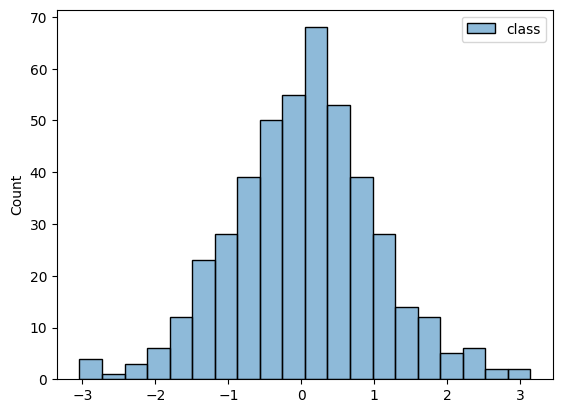

In [16]:
class1_data_array = artificial_data_generator_tools.generate_normal_distributed_informative_features_for_one_class(
    number_of_samples=number_of_samples_per_class,
    number_of_normal_distributed_relevant_features=number_of_informative_features,
    scale=1,
)
class1_data_array = artificial_data_generator_tools.build_class(class_features_list=[class1_data_array])

# show plot
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(class1_data_array) 

## 1.3 Transform class 1 to log-normal distributed features
Class 1 needs to be transformed to log-normal distribution. The new result is displayed in a histogram.

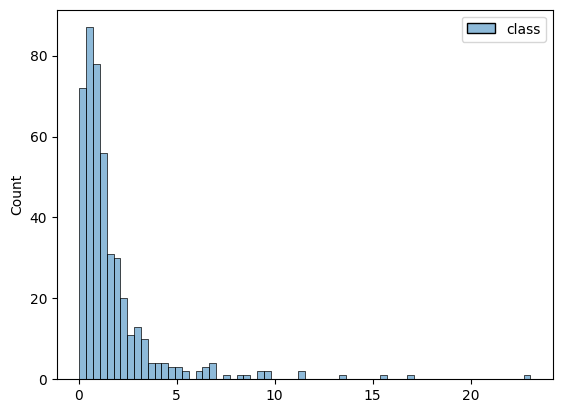

In [17]:
log_normal_distributed_class1_data_array = (
    artificial_data_generator_tools.transform_normal_distributed_class_features_to_lognormal_distribution(
        class_features_data_array=class1_data_array
    )
)
assert log_normal_distributed_class1_data_array.shape[1] == number_of_informative_features

# show plot
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(
    log_normal_distributed_class1_data_array,
)

## 1.4 Generate class 2
The second class is generated with the same values as Class 1.

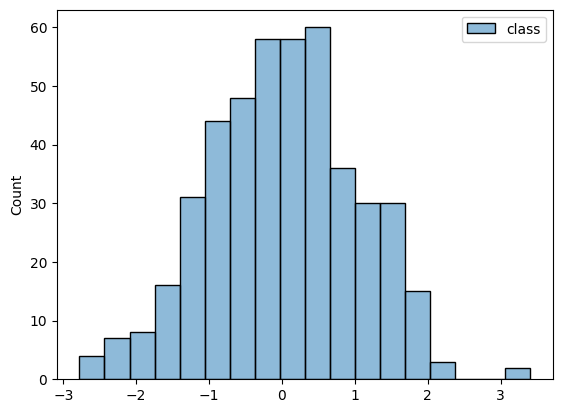

In [18]:
class2_data_array = artificial_data_generator_tools.generate_normal_distributed_informative_features_for_one_class(
    number_of_samples=number_of_samples_per_class,
    number_of_normal_distributed_relevant_features=number_of_informative_features,
    scale=1,
)
class2_data_array = artificial_data_generator_tools.build_class(class_features_list=[class2_data_array])

# show plot
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(class2_data_array)

## 1.5 Show plot distribution of all classes
Once both classes have been generated, their distributions can be superimposed and examined.

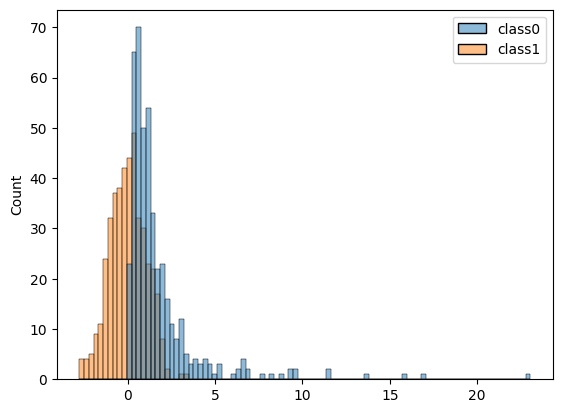

In [19]:
artificial_data_generator_tools.plot_distributions_of_all_classes(
    [log_normal_distributed_class1_data_array, class2_data_array]
)

## 1.6 Shift Class to enlarge effectsize
In the next step, the effect size is increased by shifting the class. The result is again visible in the plot. To see the effect, compare the plot with the one from Section 1.5.

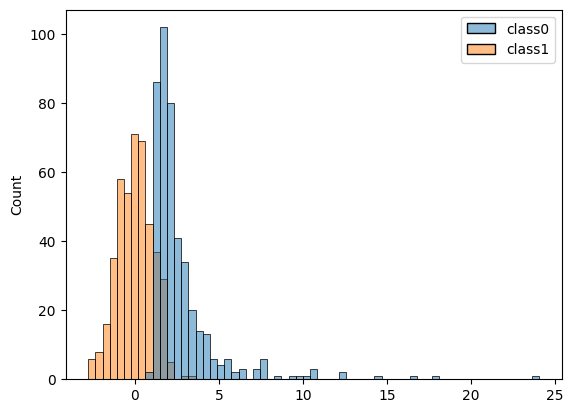

In [20]:
shifted_class1_data_array = artificial_data_generator_tools.shift_class_to_enlarge_effectsize(
    log_normal_distributed_class1_data_array, effect_size=1
)

# show plot
artificial_data_generator_tools.plot_distributions_of_all_classes([shifted_class1_data_array, class2_data_array])

## 1.7 Generate artificial classification data
The individual parts of the data are combined to form the complete data set. The dataset consists of the following parts and in the following order:
- class labels
- informative features
- pseudo class features
- random features

In [21]:
artificial_data_df = artificial_data_generator_tools.generate_artificial_classification_data(
    generated_classes_list=[shifted_class1_data_array, class2_data_array],
    number_of_samples_per_class=number_of_samples_per_class,
    number_of_random_features=number_of_random_features,
    number_of_pseudo_class_features=number_of_pseudo_class_features,
    number_of_pseudo_classes=2,
)
assert (
    artificial_data_df.shape[1]
    == number_of_informative_features + number_of_pseudo_class_features + number_of_random_features + 1
)  # label column
print("The complete data set has the following shape:")
print(f"number of samples: {artificial_data_df.shape[0]}")
print(f"number of features: {artificial_data_df.shape[1]}")

The complete data set has the following shape:
number of samples: 30
number of features: 10041


## 1.8 Save CSV
In the final step, the data can be downloaded in CSV format and are ready for further analysis and processing.

In [22]:
artificial_data_df.to_csv(
    f"../examples/data/data_i{number_of_informative_features}.csv", index=False
)